#### Dataset Description and Exploratory Analysis
**Dataset Description**

El dataset que seleccioné para esta tarea fue *Blood Transfusion Service Center*, por Yeh (2008) y recuperado del [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/). Este dataset corresponde a un problema de clasificación dentro del área de negocios y marketing, específicamente en el contexto de campañas del área de salud.

Los datos fueron recolectados con el propósito de evaluar el modelo RFMTC, una adaptación del modelo RFM utilizado en marketing, con el objetivo de analizar el historial de donaciones y predecir el comportamiento de los donantes ante campañas de donación que se realizan cada tres meses.

El dataset contiene información de 748 donantes (datos), seleccionados de manera random, y cuenta con 4 variables predictoras:

- R -> Recency (integer): cantidad de meses desde la última donación.
- F -> Frequency (integer): número total de donaciones realizadas.
- M -> Monetary (integer): volumen total de sangre donada (en centímetros cúbicos).
- T -> Time (integer): cantidad de meses desde la primera donación.


La variable a -> objetivo (binaria) representa si el donante participó en la campaña de donación de sangre de marzo de 2007. Está clasifica de la siguiente manera:

- 1 = donó
- 0 = no donó

**Data Cleaning**

Para comenzar con el proceso de limpieza de datos, primeramente importé las librerías pandas y numpy para poder cargar los datos y realizar los cálculos matemáticos correspondientes. Posteriormente, subí el dataset y se guardó como df. Antes de continuar con el proceso de limpieza, cambié los nombres de las variables (como se explicó anteriormente) con el fin de tener una mejor visualización y manejo de los datos.

A manera de revisión, se imprimieron los primeros 10 registros del dataset para verificar que la carga se hubiera realizado correctamente.

Ya con este proceso de carga completo, se comenzó con la verificación y limpieza de datos. Primero, se revisó la cantidad de valores faltantes utilizando la función isnull(). Como resultado, se observó que no existen datos faltantes, lo cual coincide con la descripción proporcionada por el UC Irvine Machine Learning Repository.

Posteriormente, analicé si alguna variable no era relevante para la predicción de la variable objetivo (a); sin embargo, se concluyó que todas las variables aportan información importante para el modelo, por lo que no se eliminó ninguna. Dado que la base de datos se encontraba bastante limpia, se procedió a realizar un análisis más específico.

En un inicio intenté revisar la presencia de outliers; sin embargo, los valores pueden variar considerablemente dependiendo de los hábitos de donación de cada persona. Mientras que algunos donantes son nuevos, otros pueden donar con mucha frecuencia. Debido a esta variabilidad natural en el comportamiento de los donantes, se decidió no eliminar datos únicamente por presentar valores extremos.

Por otro lado, según la Organización Mundial de la Salud (2022), “En la mayoría de los países, el volumen de sangre que se extrae es de 450 mililitros”. Con esto en mente, se estableció que debe existir una relación entre el volumen total de sangre donada (M -> Monetary) y el número total de donaciones realizadas (F -> Frequency). Es por ello que creé una nueva columna llamada Vol_esp, donde se multiplica el número de donaciones por 450 centímetros cúbicos (equivalentes a mililitros), con el fin de estimar el volumen esperado de sangre donada por cada persona.

Antes de comparar los volúmenes de sangre, se definió una tolerancia equivalente a 10 sesiones de donación (4500 mililitros). Posteriormente, mediante un ciclo for, se recorrieron todos los datos calculando la diferencia entre el valor real de volumen de sangre (M) y su valor estimado (Vol_esp). Si la diferencia absoluta superaba la tolerancia establecida, el índice se almacenaba en una lista llamada inconsistencias. Finalmente, se imprimieron los registros detectados.

Al analizar los resultados, se observó que todas las diferencias eran negativas, es decir, las personas donaron menos volumen del estimado. Por esta razón, se decidió no eliminar dichos datos, ya que es posible que en ciertas ocasiones el volumen donado haya sido menor al estándar. Lo que, en mi opinión, sí resultaría problemático sería que el volumen superara considerablemente el límite recomendado por la OMS. (OMS, 2022)

Se optó por mantener los datos considerando que el tamaño de la muestra no es muy grande (menos de 1000 registros). No obstante, también sería válido eliminar estos registros si se considerara necesario.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar datos
df = pd.read_csv("transfusion.data")

# Cambiar nombres a variables
df.columns = ["R", "F", "M", "T", "a"]

# Verificar datos
print("Primeros datos del dataset:")
print(df.head(10))

# Verificación de valores faltantes
print("\nValores faltantes por variable")
print(df.isnull().sum())

# Coherencia entre M y F

df["Vol_esp"] = df["F"] * 450
tolerancia = 4500
inconsistencias = []

for i in range(len(df)):
    real = df.loc[i, "M"]
    esp = df.loc[i, "Vol_esp"]
    if abs(real - esp) > tolerancia:
        inconsistencias.append(i)

print("\nDatos con inconsistencias:")
print(df.loc[inconsistencias])

Primeros datos del dataset:
   R   F      M   T  a
0  2  50  12500  98  1
1  0  13   3250  28  1
2  1  16   4000  35  1
3  2  20   5000  45  1
4  1  24   6000  77  0
5  4   4   1000   4  0
6  2   7   1750  14  1
7  1  12   3000  35  0
8  2   9   2250  22  1
9  5  46  11500  98  1

Valores faltantes por variable
R    0
F    0
M    0
T    0
a    0
dtype: int64

Datos con inconsistencias:
      R   F      M   T  a  Vol_esp
0     2  50  12500  98  1    22500
4     1  24   6000  77  0    10800
9     5  46  11500  98  1    20700
10    4  23   5750  58  0    10350
115  11  24   6000  64  0    10800
341  23  38   9500  98  0    17100
500   2  43  10750  86  1    19350
502   2  34   8500  77  1    15300
503   2  44  11000  98  0    19800
504   0  26   6500  76  1    11700
505   2  41  10250  98  1    18450
517   4  33   8250  98  1    14850
528   5  24   6000  79  0    10800


**Exploratory Data Analysis**

Para realizar un análisis exploratorio de los datos, se optó por desarrollar dos análisis principales: las estadísticas descriptivas de las variables y la distribución de la variable objetivo.

Antes de comenzar, fue necesario eliminar la columna que se había agregado en el análisis de inconsistencias de la instrucción anterior, con el fin de trabajar únicamente con las variables originales del dataset.

- *Estadísticas descriptivas*

Comenzando con las estadísticas descriptivas, se utilizó *df.describe()* para obtener información como la media, desviación estándar, etc.

Analizando la variable Recency (R), observamos que en promedio las personas han donado hace aproximadamente 9.5 meses, es decir, cerca de los últimos 10 meses. Sin embargo, el valor máximo de 74 meses confirma que existen donantes que llevan mucho tiempo sin realizar una donación.

En cuanto a la variable Frequency (F), se puede observar una gran variabilidad. Aunque el promedio es de 5.5 donaciones, existe un máximo de 50 donaciones, lo que indica que hay personas con un fuerte hábito de donación. Al mismo tiempo, el mínimo es de 1 donación, lo que confirma que también hay personas que apenas han donado una vez. Esto muestra diferencias importantes en el comportamiento de los donantes de sangre.

Respecto a la variable Monetary (M), el análisis puede relacionarse con lo observado en la instrucción anterior. Si el mínimo de donaciones es 1 y el volumen mínimo registrado es 250 c.c., se puede inferir que cada donación corresponde aproximadamente a 250 c.c. de sangre (menos volumen que el estándar establecido por la OMS). Además, el máximo de 12,500 c.c. coincide con las 50 donaciones máximas (50 × 250 = 12,500), lo que confirma que esta variable depende directamente de Frequency.

En relación con la variable Time (T), se observa que hay personas relativamente nuevas en el sistema de donación (mínimo de 2 meses), mientras que otras llevan hasta 98 meses, es decir, más de 8 años registradas. Esto indica que el dataset incluye tanto donantes recientes como donantes con mucha antigüedad.

Finalmente, en la variable objetivo a, cuya media es 0.2379, se puede interpretar que aproximadamente el 23.79% de los donantes sí realizó una donación en marzo de 2007, mientras que el resto no lo hizo.

- *Distribución de la variable objetivo*

Continuando con el análisis, se realizó un histograma de la variable objetivo utilizando *plt.hist(df['a'])*. En esta gráfica se puede observar claramente que existen muchos más casos donde el donante no participó en la campaña de marzo de 2007 que casos donde sí participó.

Esto es importante porque indica que el dataset presenta un desbalance de clases, ya que la mayoría de los registros pertenecen a la clase 0 (no donó). Este desbalance debe tomarse en cuenta en etapas posteriores, especialmente al momento de evaluar el desempeño del modelo.

Estadísticas:
                R           F             M           T           a
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.514706   1378.676471   34.282086    0.237968
std      8.095396    5.839307   1459.826781   24.376714    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   98.000000    1.000000


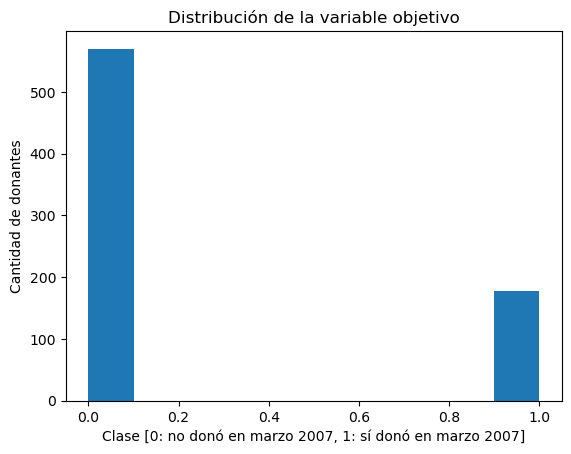

In [2]:
df = df.drop('Vol_esp', axis=1)

# Estadísticas de las variables
print("Estadísticas:")
print(df.describe())

# Revisar distribución de variable objetivo (a)
plt.figure()
plt.hist(df['a']);
plt.xlabel('Clase [0: no donó en marzo 2007, 1: sí donó en marzo 2007]')
plt.ylabel('Cantidad de donantes')
plt.title('Distribución de la variable objetivo')
plt.show()

#### Principal Component Analysis Procedure

Para esta sección de la tarea se utilizará el procedimiento de Principal Component Analysis (PCA). De acuerdo con lo visto en clase y con la investigación realizada, este método se emplea principalmente para reducir la dimensionalidad de conjuntos de datos, transformando las variables originales en un nuevo conjunto de variables no correlacionadas llamadas componentes principales, por ello el nombre del análisis.(IBM, 2025)

A continuación se presenta el procedimiento para realizar el PCA:

**Data standardisation**

Antes de comenzar con el procedimiento de Principal Component Analysis (PCA), es importante aclarar que este método es sensible a la escala de las variables. Si las variables tienen magnitudes muy diferentes, aquellas con mayor varianza pueden dominar el análisis y afectar la dirección de los componentes principales. Por esta razón, es necesario estandarizar los datos antes de aplicar PCA, para que todas las variables contribuyan de igual manera (IBM, 2025).

Para ello, primero se construyó una matriz X que contiene únicamente las variables predictoras del modelo (R, F, M y T) ya que se estará trabajando únicamente con estas. Posteriormente, almacené el número total de observaciones en la variable n, la cual se utilizará en próximos cálculos .

A partir de la matriz X, calculé las medias (*np.mean(X, axis=0)*) y desviaciones estándar (*np.std(X, axis=0, ddof=1)*) de cada variable. Con estos valores se realizó la estandarización de los datos utilizando la fórmula: 

$$X_z = \frac{X - \mu}{\sigma}$$

El resultado es una nueva matriz X_z, cuyos valores tienen media cero (o muy cercana a cero) y desviación estándar igual a uno. Finalmente, imprimí estos valores para comprobar que la estandarización se realizó correctamente.

nota: ddof=1 → se usa para calcular la desviación estándar muestral (divide entre n-1)

**Covariance matrix**

Para continuar con el procedimiento de PCA, calculé la matriz de covarianza a partir de los datos estandarizados X_z utilizando la fórmula vista en clase la cual se puede observar en la variable cov. 

$$\Sigma_{X_z} = \frac{1}{N-1} X_z^T X_z$$

En los resultados de la matriz de covarianza podemos observar la relación lineal entre las variables, considerando que están organizadas en el orden ['R', 'F', 'M', 'T'] tanto en las filas como en las columnas. Esto nos permite identificar fácilmente los valores de intersección entre cada par de variables, los cuales representan su nivel de correlación.

En primer lugar, se observa que la diagonal principal está compuesta por valores iguales a 1. Esto confirma que cada variable tiene varianza unitaria, lo cual es tiene sentido con el proceso de estandarización realizado anteriormente.

Por otro lado, la covarianza entre Frequency (F) y Monetary (M) es exactamente 1 ( o algo muy cercano a 1). Esto indica una correlación alta y positiva entre ambas variables. Este resultado tiene lógica, ya que el volumen total de sangre donada depende directamente del número total de donaciones realizadas; esto puede llevar a una redundancia en el dataset que seleccioné.

Ahora, la variable Time (T) muestra una covarianza positiva considerable con F y M (0.6349). Esto indica que mientras más tiempo lleva una persona siendo donante, mayor tiende a ser su frecuencia de donaciones y, por lo tanto, el volumen total donado. 

En cuanto a Recency (R), se observa una covarianza negativa con F y M (-0.1827). Esto sugiere que mientras mayor sea el tiempo desde la última donación (valores altos de R), menor tiende a ser la frecuencia y el volumen total donado. Esta relación también me resulta lógica, ya que los donantes más activos suelen haber donado recientemente.

Considerando lo anterior, la matriz nos confirma que existe una fuerte dependencia entre algunas variables, especialmente entre Frequency y Monetary.

**Eigenvalues and eigenvectors**

Siguiendo con el procedimiento del PCA, se calcularon los eigenvalores y eigenvectores de la matriz de covarianza utilizando la función *np.linalg.eig(cov)*. 

En PCA, los eigenvectores representan las nuevas direcciones hacia donde se proyectan los datos; es decir, son las direcciones en las que existe mayor variación ("flechas" que mejor atraviesan la nube de puntos). Por otro lado, los eigenvalores nos dicen cuánta varianza hay en cada una de esas direcciones. Un eigenvalor grande significa que los datos están muy dispersos a lo largo de ese eigenvector, mientras que uno pequeño indica poca dispersión. (IBM, 2025)

Geométricamente, esto se puede entender como una rotación del sistema de coordenadas original. En lugar de mantener los ejes originales, el PCA los reorienta hacia nuevas direcciones perpendiculares entre sí, alineadas con la mayor dispersión de los datos. De esta forma, la mayor parte de la información (varianza) se queda en los primeros componentes principales. (IBM, 2025)

In [3]:
# Data standardisation
X = df[['R','F','M','T']].values
n = X.shape[0]
mean = np.mean(X, axis=0)
desv = np.std(X, axis=0, ddof=1)
X_z = (X - mean) / desv

print("Media después de estandarizar:")
print(np.mean(X_z, axis=0))
print("\nDesviación estándar después de estandarizar:")
print(np.std(X_z, axis=0, ddof=1))

# Covariance matrix
cov = (1/(n-1)) * np.dot(X_z.T, X_z)

print("\nMatriz de covarianza:")
print(cov)


# Eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(cov)

print("\nEigenvalores:")
print(eigvals)

print("\nEigenvectores:")
print(eigvecs)

Media después de estandarizar:
[ 1.13990813e-16 -4.74961722e-17 -1.89984689e-17  4.74961722e-17]

Desviación estándar después de estandarizar:
[1. 1. 1. 1.]

Matriz de covarianza:
[[ 1.         -0.18274547 -0.18274547  0.16061809]
 [-0.18274547  1.          1.          0.63494027]
 [-0.18274547  1.          1.          0.63494027]
 [ 0.16061809  0.63494027  0.63494027  1.        ]]

Eigenvalores:
[ 2.54104409e+00  1.10136188e+00  3.57594029e-01 -8.74346616e-18]

Eigenvectores:
[[-9.34888912e-02  9.15456285e-01 -3.91407228e-01  2.58824289e-17]
 [ 6.11256218e-01 -8.51400658e-02 -3.45133316e-01  7.07106781e-01]
 [ 6.11256218e-01 -8.51400658e-02 -3.45133316e-01 -7.07106781e-01]
 [ 4.93954957e-01  3.83981939e-01  7.80106641e-01 -8.78745908e-17]]



Antes de continuar con el procedimiento del PCA, es necesario ordenar los eigenvalores y eigenvectores de mayor a menor. Esto se hace porque el primer componente principal debe tener la máxima varianza. Visualmente, es como poner primero la "flecha" más larga (la dirección más importante).

Para esto, utilicé la función *np.argsort(eigvals)* para obtener los índices que ordenan los eigenvalores de menor a mayor. Luego, con [::-1] se invierte ese orden para que queden de mayor a menor y se guarda el orden en idx. Posteriormente, se reordenan tanto los eigenvalores como los eigenvectores usando esos índices. Esto es importante porque cada eigenvector debe mantenerse alineado con su eigenvalor correspondiente.

**Transformation matrix**

En esta parte del código primero se define la matriz de transformación (que corresponde a los eigenvectores ordenados); cada columna de esta matriz representa una nueva dirección en el espacio, es decir, un componente principal. Posteriormente, se utiliza la formula vista en clase para obtener los datos transformados en términos de las componentes principales (*X_pca = X_z.dot(F)*):

$$X_{pca} = X_z \cdot F$$

Para verificar que todo se realizó de manera correcta, se imprimen los primeros 5 datos transformados.

**Explained variance**

En esta parte del proceso, se calcula el porcentaje de varianza explicada por cada componente principal mediante *exp_V = eigvals / np.sum(eigvals)*, que obtuve de la fórmula vista en clase. Este paso nos permite identificar cuántos componentes son necesarios para conservar la mayor parte de la información del dataset.

$$V_{\lambda_j} = \frac{\lambda_j}{\sum_{i=1}^M \lambda_i}$$

Los resultados muestran que el primer componente principal explica aproximadamente el 63.5% de la varianza total, mientras que el segundo componente explica un 27.5%. Es decir, que los dos primeros componentes acumulan un 91% de la varianza, esto nos dice que la mayor parte de la información en los datos originales puede representarse adecuadamente en un espacio 2D. El tercer componente solo aporta un 8.9%, y el cuarto componente tiene un valor despreciable, lo que sugiere que puede ignorarse sin perder información.

**First three principal components**

Comenzando con el análisis de los tres primeros componentes principales, es decir, un análisis en 3D, en este bloque de código se crea una figura utilizando *plt.figure()*. Posteriormente, con *fig.add_subplot(projection='3d')*, se agrega un subplot con proyección tridimensional.

La función *ax.scatter(PC[:,0], PC[:,1], PC[:,2])* dibuja cada dato en el nuevo espacio transformado, tomando como ejes PC1, PC2 y PC3. Es decir, cada punto del gráfico representa una observación original, pero ahora expresada en términos de los componentes principales. Finalmente, etiqueté los ejes como PC1, PC2 y PC3, y añadí un título para el gráfico.

Al observar los resultados, se puede notar que existe una mayor dispersión de los puntos a lo largo del eje PC1. Esto es coherente con lo obtenido anteriormente, donde se determinó que PC1 explica aproximadamente el 63.5% de la varianza total. Es decir, la mayor parte de la información del dataset está concentrada en esta dirección.

En el caso de PC2, todavía se puede observar cierta dispersión, pero menor en comparación con PC1, lo cual también coincide con el porcentaje de varianza explicada. Por último, PC3 solo aporta alrededor del 8.9% de la varianza, por lo que los datos se observan más concentrados en ese eje. Esto nos dice que esta componente aporta poca información.

**First two principal components**

Finalmente, se genera una gráfica en 2D utilizando *plt.scatter(X_pca[:,0], X_pca[:,1])*, donde se representan únicamente los primeros 2 PCs. Con la función *plt.scatter(X_pca[:,0], X_pca[:,1])* se dibuja cada dato en el nuevo espacio transformado, tomando como ejes PC1 y PC2. Finalmente, se etiquetaron los ejes como PC1 y PC2, y añadí un título para el gráfico.

A diferencia del gráfico 3D anterior, esta visualización en 2D resulta mucho más útil porque los primeros dos componentes principales concentran la mayor parte de la varianza del conjunto de datos, aproximadamente un 91% (63.5% + 27.5%). Al reducir una dimensión, se facilita la interpretación visual sin perder una cantidad significativa de información.

Como se puede observar, la nube de puntos presenta mayor dispersión a lo largo de PC1, lo cual es consistente con los resultados anteriores de que este componente explica la mayor proporción de la variabilidad. Por su parte, PC2 también aporta variación relevante, aunque en menor medida. En conjunto, ambos componentes se complementan para representar la mayor parte de la variabilidad del sistema en un espacio transformado de menor dimensión.

Primeros datos transformados:
[[ 1.06912352e+01 -1.14243471e+00 -2.85657086e+00 -5.55123236e-16]
 [ 1.54960554e+00 -1.39228406e+00 -6.26237292e-01 -3.99481172e-17]
 [ 2.30797837e+00 -1.25641955e+00 -8.05202884e-01 -4.52816445e-16]
 [ 3.33650055e+00 -1.10246007e+00 -1.00637247e+00 -2.78261048e-16]
 [ 4.83391419e+00 -8.28123794e-01 -4.06796594e-01 -6.27101735e-16]]

Varianza explicada:
[ 6.35261023e-01  2.75340470e-01  8.93985071e-02 -2.18586654e-18]


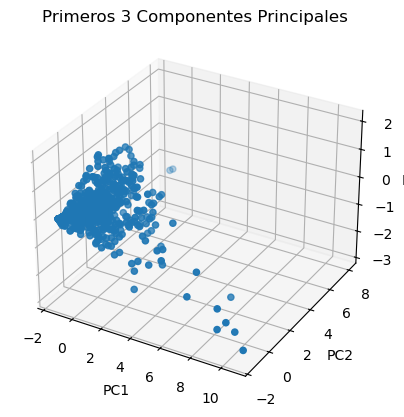

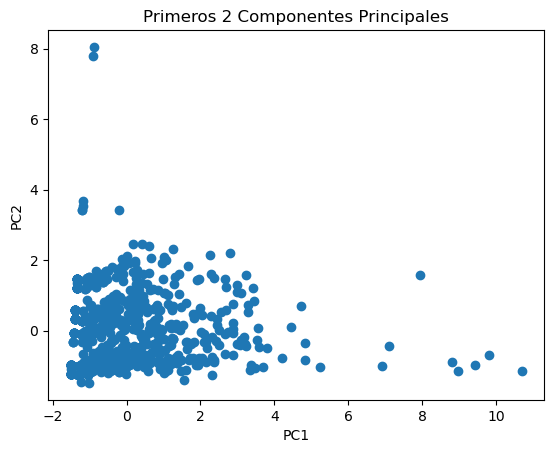

In [4]:
idx = np.argsort(eigvals)[::-1]

eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]


# Transformation matrix
F = eigvecs
X_pca = X_z.dot(F)

print("Primeros datos transformados:")
print(X_pca[:5])


# Explained variance
exp_V = eigvals / np.sum(eigvals)

print("\nVarianza explicada:")
print(exp_V)


# First three principal components

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.title("Primeros 3 Componentes Principales")
plt.show()


# First two principal components 
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Primeros 2 Componentes Principales")
plt.show()

#### Conclusiones

En conclusión, esta tarea en lo personal representó un reto para mí porque me llevó a comprender realmente el procedimiento detrás del PCA y no solo aplicarlo como una función. Aunque el dataset seleccionado cuenta únicamente con cuatro variables predictoras, el análisis me permitió evaluar la efectividad del PCA en el contexto específico. Si bien no se logró una reducción drástica en el número de variables, el PCA sí fue efectivo al concentrar aproximadamente el 91% de la varianza en los primeros dos componentes principales.

Uno de mis principales aprendizajes fue entender que la reducción de dimensionalidad no solamente es “eliminar variables”, sino organizar la información para capturar la mayor variabilidad posible en menos componentes. En este caso, el PCA ayudó especialmente a manejar la alta correlación entre Frequency y Monetary, ya que ambas variables aportaban información muy similar.

En cuanto al espacio reducido para modelos como regresión o clasificación, considero que el uso de los primeros dos o tres componentes principales puede ser adecuado. Reducir dimensiones disminuye el costo computacional, y puede ayudar a evitar sobreajuste, mejorando la estabilidad del modelo. Para un problema de clasificación como este, donde la variable objetivo es binaria, trabajar con dos componentes podría ser suficiente, ya que conservan la mayor parte de la varianza. Sin embargo, incluir el tercer componente (explica alrededor del 8.9%) podría aportar información adicional relevante dependiendo del modelo.

En general, aunque el dataset no tenía muchas variables predictorias, el PCA me permitió comprender mejor la estructura interna de los datos y la relación entre variables. Más que reducir muchas variables, el verdadero aporte fue entender cómo se redistribuye la información en nuevas direcciones y cómo esto puede beneficiar a mis futuros modelos de regresión o clasificación.

#### Github

https://mariae-olivares.github.io/02-Principal-Component-Analysis/

#### Referencias

IBM. (2025). PCA. ¿Qué es el análisis de componentes principales (PCA)? https://www.ibm.com/mx-es/think/topics/principal-component-analysis

OMS. (2022, 6 junio). Productos de sangre: donación de sangre. https://www.who.int/es/news-room/questions-and-answers/item/blood-products-why-should-i-donate-blood

Yeh, I. (2008). Blood Transfusion Service Center [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5GS39.